In [336]:
import pandas as pd
import numpy as np
from pathlib import Path
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
from IPython.display import Audio
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Dataframe diagnosis sound extracts

In [337]:
df_demographic = pd.read_csv("data/demographic_info.txt", sep=' ', header=None, na_values='NA')
df_demographic.columns = ["patient_number","age","sex", "adult_bmi","child_weight","child_height"]

df_patient_diagnosis = pd.read_csv("data/patient_diagnosis.csv")
df_patient_diagnosis.columns = ["patient_number","diagnosis"]

# merge the two dataframes on the patient_number column
merged_df = pd.merge(df_demographic, df_patient_diagnosis, on='patient_number')

# extract filenames from "data/selected_files" directory
selected_filenames = os.listdir("data/selected_files")
patients_numbers = [int(filename.split('_')[0].split('.')[0]) for filename in selected_filenames]

# we keep only the patients that are in the selected files
merged_df = merged_df[merged_df['patient_number'].isin(patients_numbers)]
merged_df.sort_values(by='patient_number', inplace=True)
print(merged_df)
    

     patient_number    age sex  adult_bmi  child_weight  child_height  \
0               102   0.75   F        NaN          9.80          73.0   
1               103  70.00   F      33.00           NaN           NaN   
2               104  70.00   F      28.47           NaN           NaN   
3               105   7.00   F        NaN         32.00         135.0   
4               106  73.00   F      21.00           NaN           NaN   
5               107  75.00   F      33.70           NaN           NaN   
6               108   3.00   M        NaN           NaN           NaN   
7               109  84.00   F      33.53           NaN           NaN   
8               110  75.00   M      25.21           NaN           NaN   
9               111  63.00   M      28.40           NaN           NaN   
13              115   0.58   M        NaN          7.14          64.0   
14              116  56.00   M      28.58           NaN           NaN   
17              119   2.00   F        NaN         1

# Several diagnosis plots

In [338]:
def generate_plot(merged_df, class_name):
    patient = merged_df[merged_df['diagnosis'] == class_name].iloc[0]
    filenames = [filename for filename in selected_filenames if filename.startswith(str(patient['patient_number']))]
    wav_filename = [filename for filename in filenames if filename.endswith("wav")][0]
    txt_filename = [filename for filename in filenames if filename.endswith("txt")][0]
    # Load txt file
    df_txt_file = pd.read_csv(Path.cwd() / "data" / "selected_files" / txt_filename, sep='\t', header=None, na_values='NA')
    df_txt_file.columns = ["start", "end", "crackles", "wheezes"]
    # Load wav file
    y, sr = librosa.load(Path.cwd() / "data" / "selected_files" / wav_filename)
    # Plot
    plt.figure(figsize=(12, 8))
    librosa.display.waveshow(y, sr=sr)
    plt.title("Waveform of the first "+ class_name +" patient")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    # Annotate the plot
    for index, row in df_txt_file.iterrows():
        time = row['start']
        if row['crackles'] == 1:
            plt.annotate('crackle', 
                        xy=(time, 0), 
                        xytext=(time + 0.5, 0.3),
                        arrowprops=dict(facecolor='black', arrowstyle='->'))
        if row["wheezes"] == 1:
            plt.annotate('wheeze', 
                        xy=(time, 0), 
                        xytext=(time + 0.5, 0.3),
                        arrowprops=dict(facecolor='black', arrowstyle='->'))
    plt.show()
    return wav_filename


In [339]:
def generate_spectrogram(wav_filename, class_name):
    y, sr = librosa.load(Path.cwd() / "data" / "selected_files" / wav_filename)
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
    plt.figure(figsize=(12, 8))
    librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Spectrogram of the first '+ class_name +' patient')
    plt.show()
    return y, sr


## Healthy

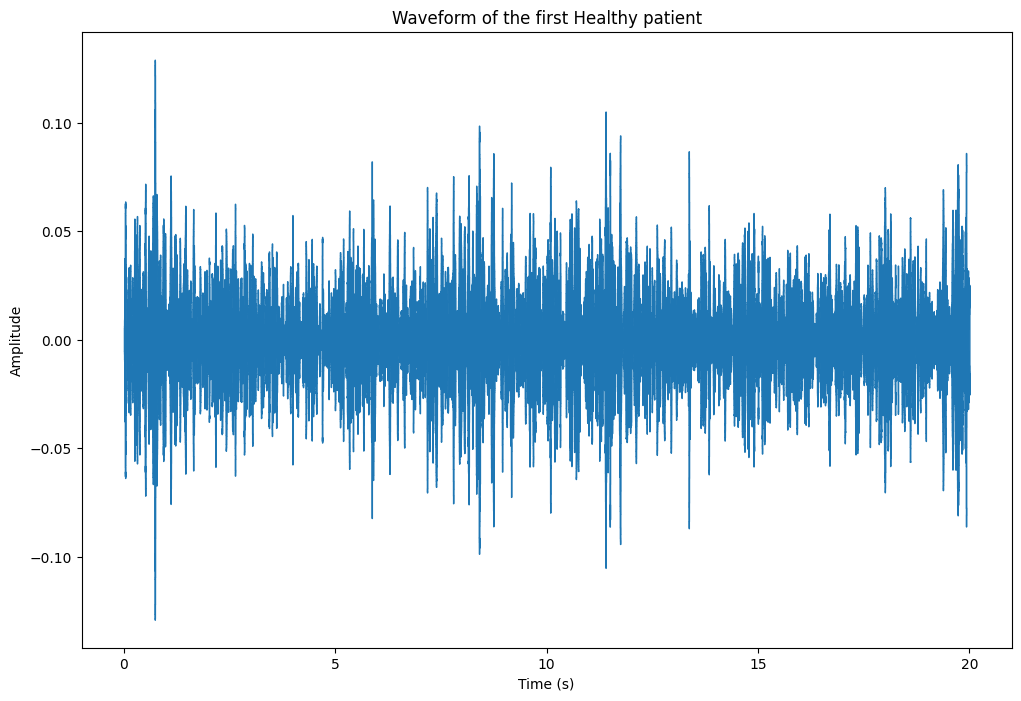

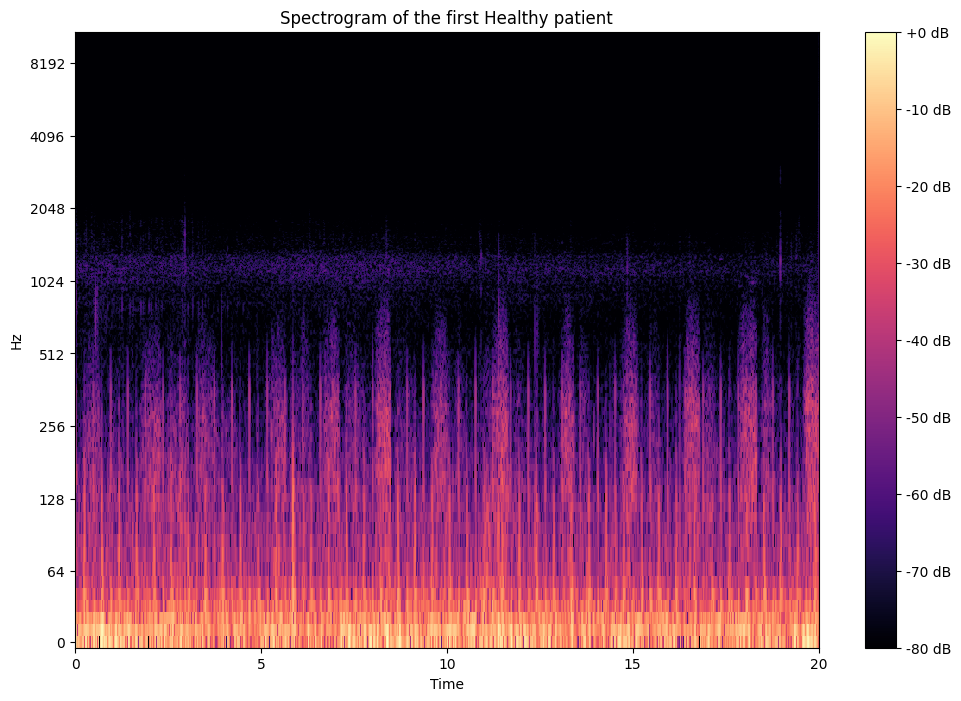

(array([ 0.00284162,  0.00422829,  0.00364514, ..., -0.01374734,
        -0.01390195, -0.01605711], dtype=float32),
 22050)

In [340]:
wav_filename = generate_plot(merged_df, "Healthy")
Audio(Path.cwd() / "data" / "selected_files" / wav_filename)
generate_spectrogram(wav_filename, "Healthy")

## Asthma

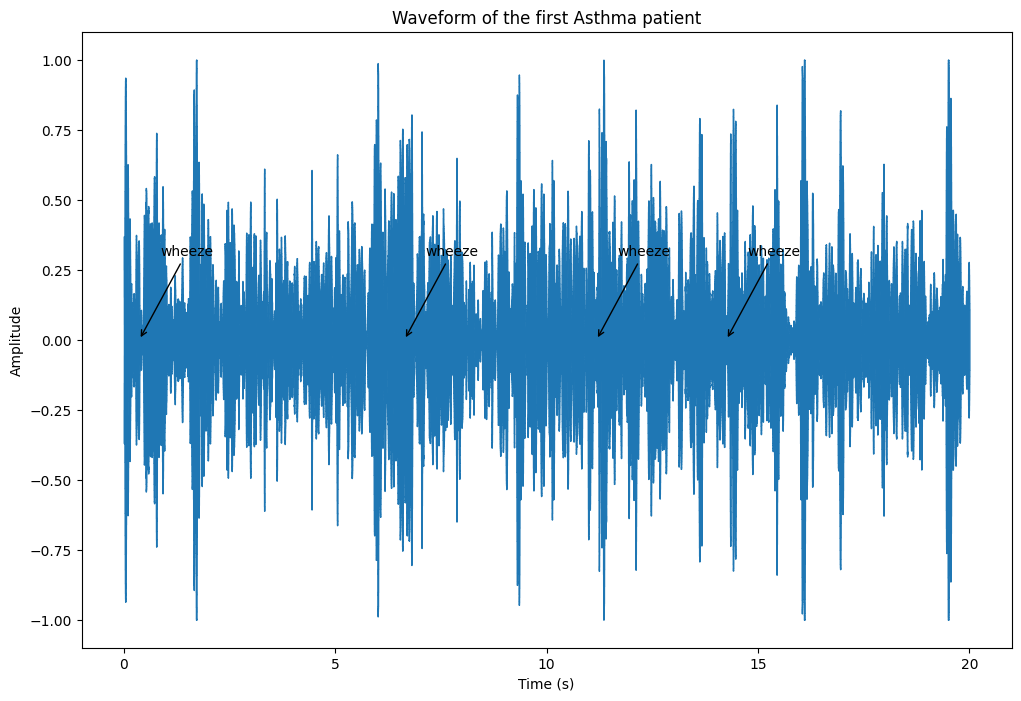

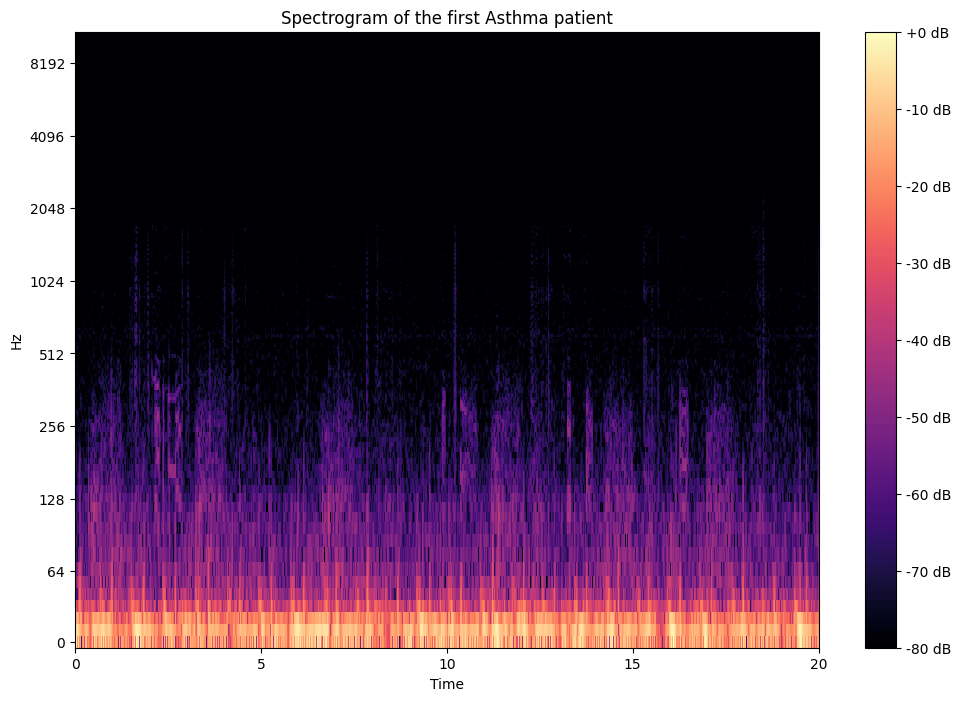

(array([-0.2553652 , -0.36991683, -0.32370543, ..., -0.05160575,
        -0.04817004, -0.05143753], dtype=float32),
 22050)

In [341]:
wav_filename = generate_plot(merged_df, "Asthma")
Audio(Path.cwd() / "data" / "selected_files" / wav_filename)
generate_spectrogram(wav_filename, "Asthma")

## COPD  

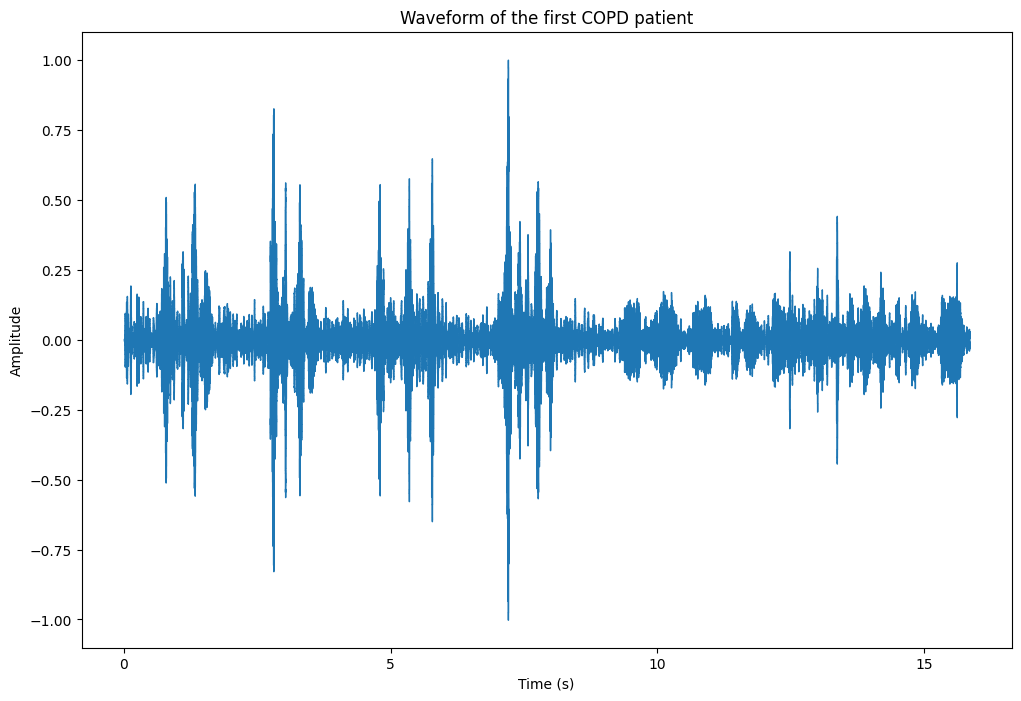

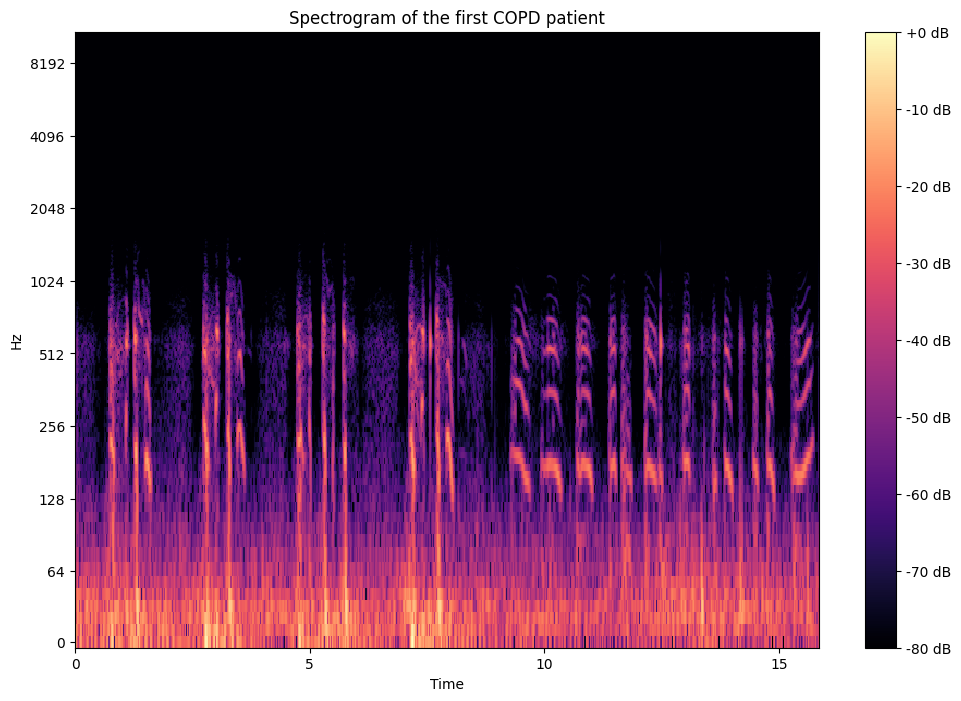

(array([ 2.8137118e-05,  6.2920153e-06, -3.5382807e-05, ...,
        -1.4128329e-02, -8.6970516e-03, -3.8011954e-03], dtype=float32),
 22050)

In [342]:
wav_filename = generate_plot(merged_df, "COPD")
Audio(Path.cwd() / "data" / "selected_files" / wav_filename)
generate_spectrogram(wav_filename, "COPD")

## URTI  

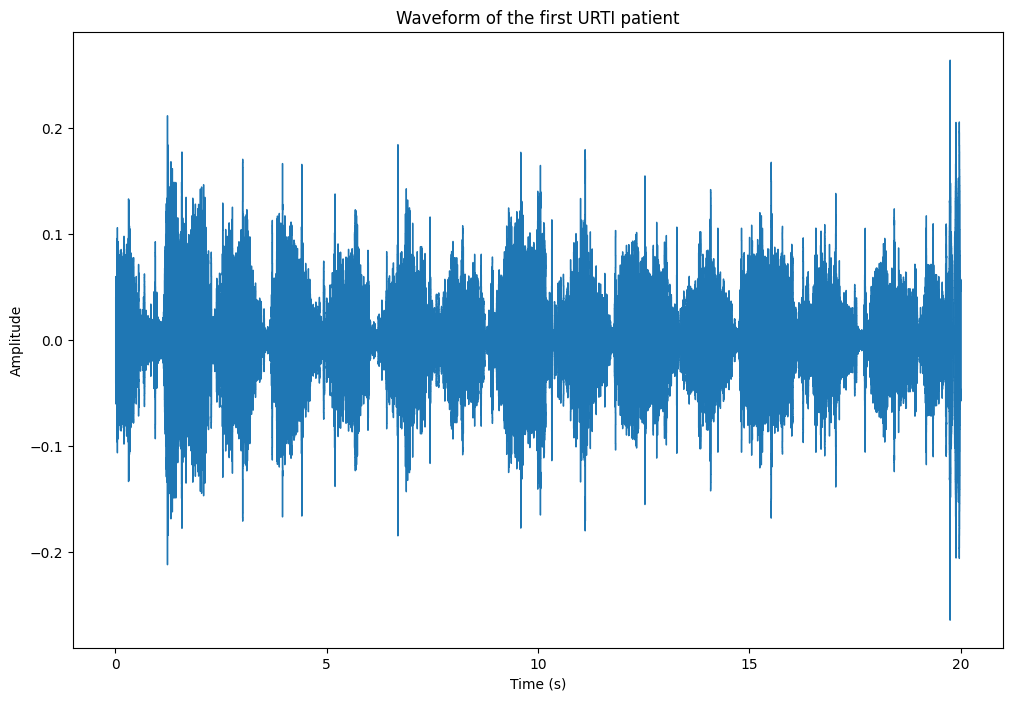

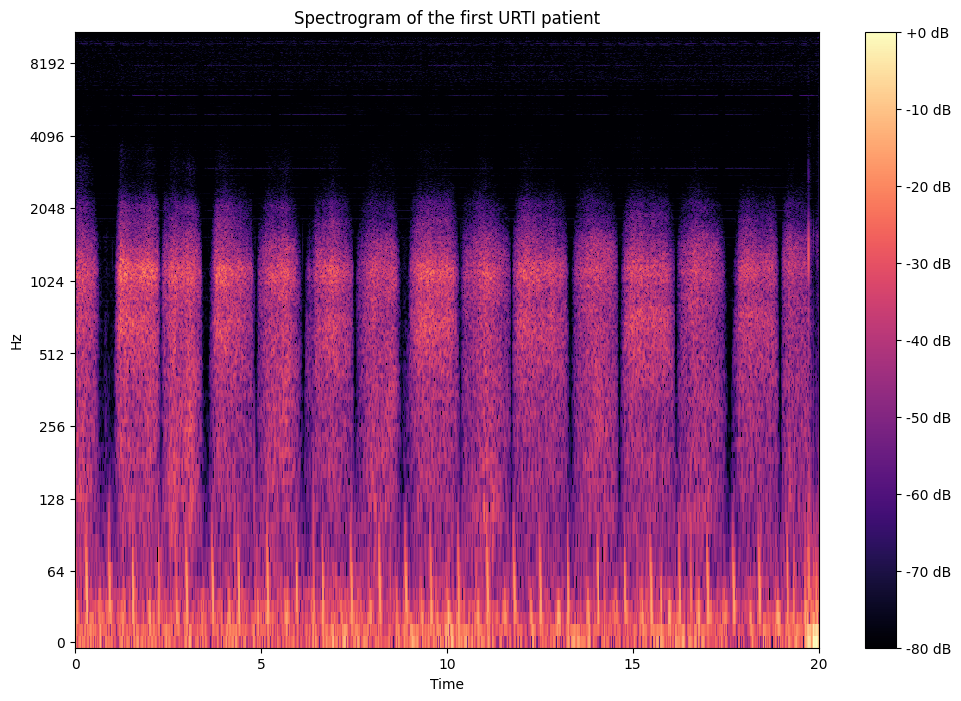

(array([0.00082267, 0.00168314, 0.00343998, ..., 0.03299017, 0.03149725,
        0.03432505], dtype=float32),
 22050)

In [343]:
wav_filename = generate_plot(merged_df, "URTI")
Audio(Path.cwd() / "data" / "selected_files" / wav_filename)
generate_spectrogram(wav_filename, "URTI")

## LRTI  

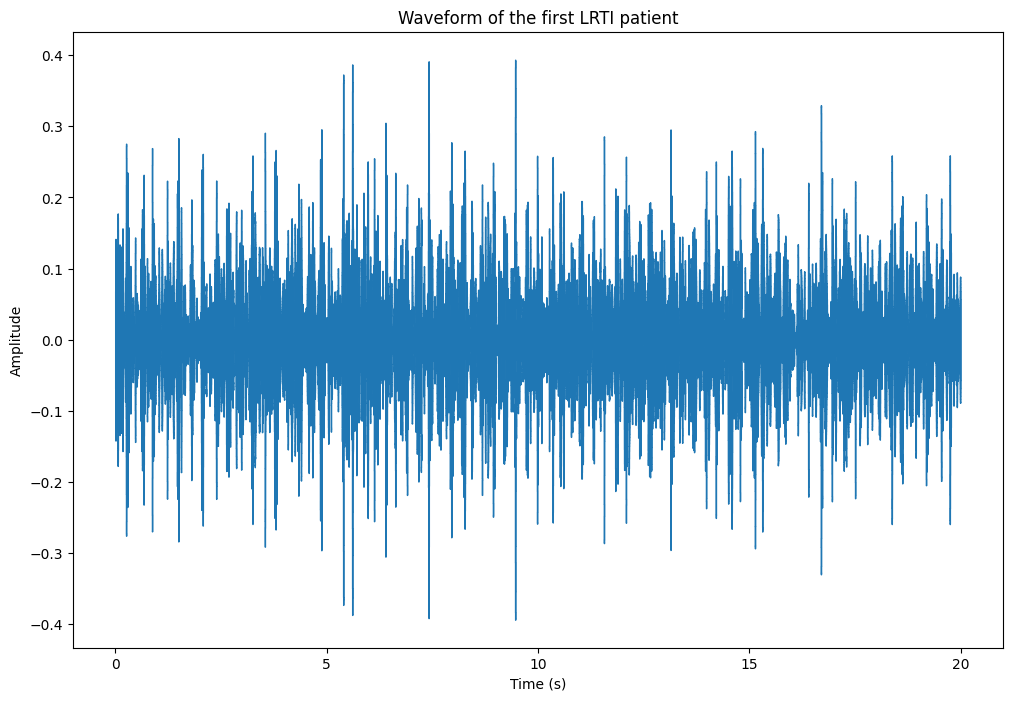

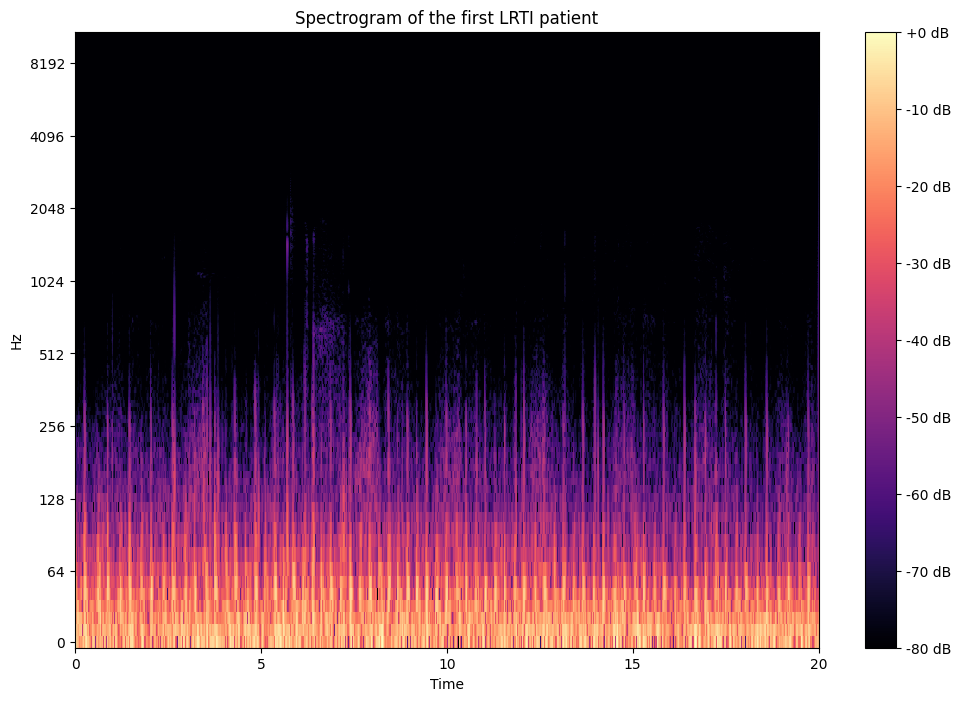

(array([-0.00952007, -0.01513208, -0.01496341, ...,  0.03132168,
         0.02991456,  0.03197349], dtype=float32),
 22050)

In [344]:
wav_filename = generate_plot(merged_df, "LRTI")
Audio(Path.cwd() / "data" / "selected_files" / wav_filename)
generate_spectrogram(wav_filename, "LRTI")

## Bronchiectasis

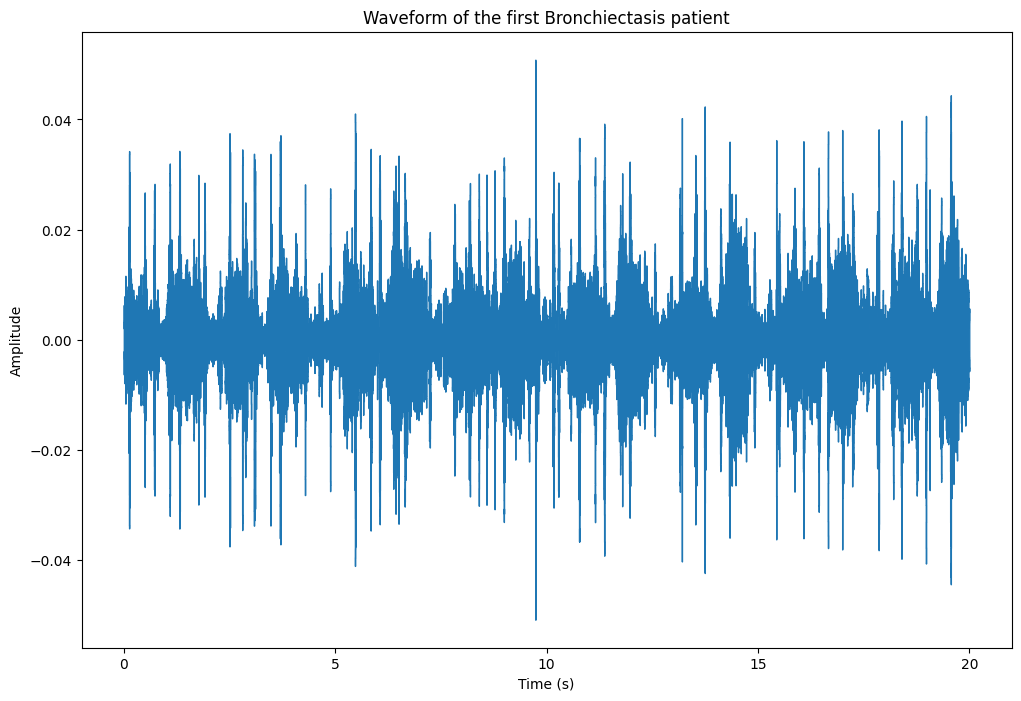

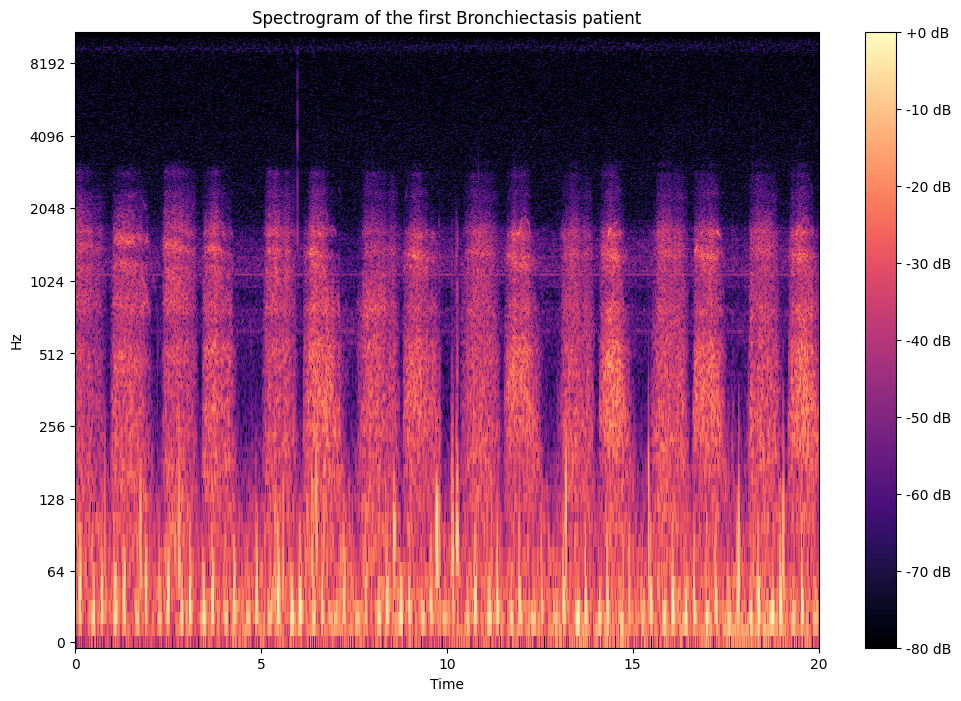

(array([-0.00200442, -0.00318893, -0.00332277, ..., -0.00063941,
        -0.00038693, -0.00015917], dtype=float32),
 22050)

In [345]:
wav_filename = generate_plot(merged_df, "Bronchiectasis")
Audio(Path.cwd() / "data" / "selected_files" / wav_filename)
generate_spectrogram(wav_filename, "Bronchiectasis")

## Bronchiolitis  

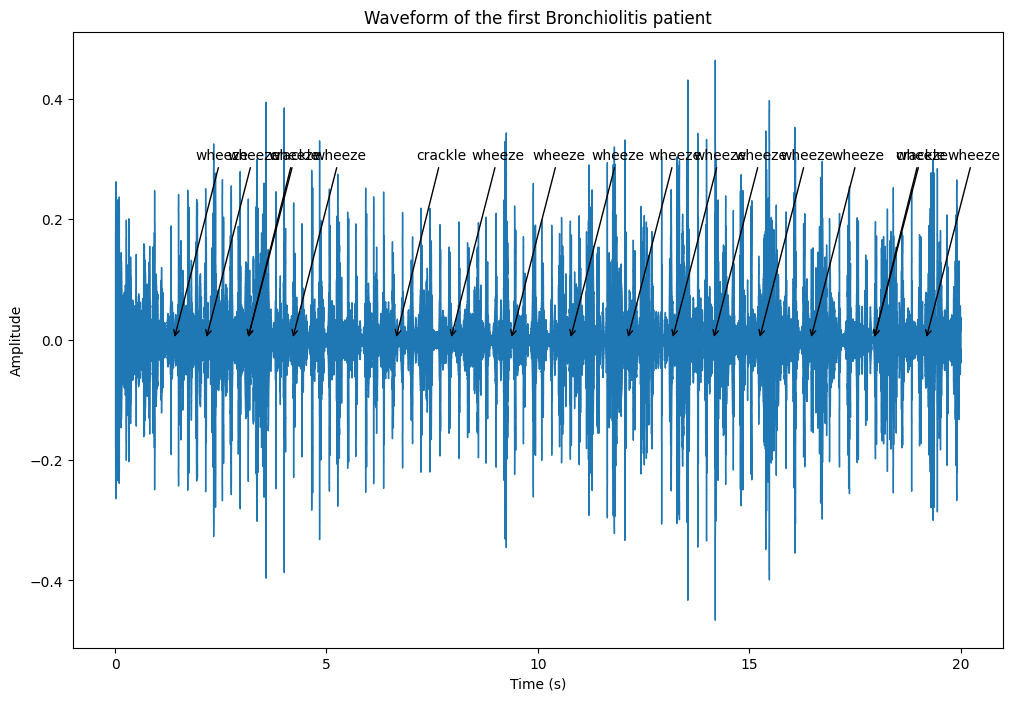

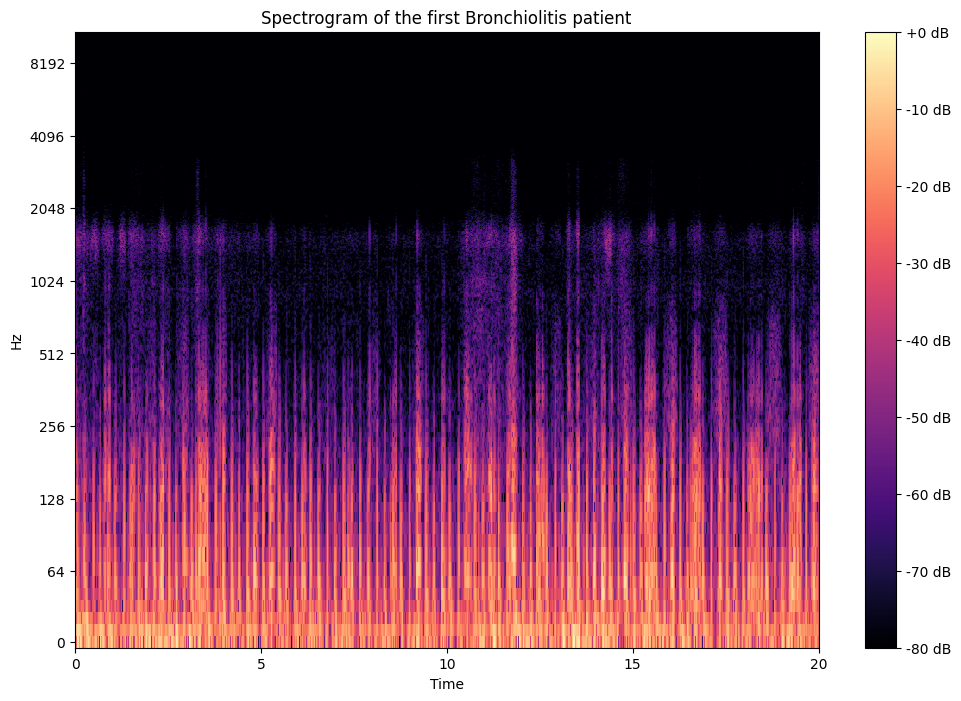

(array([-0.12161022, -0.18025038, -0.16308574, ...,  0.01879526,
         0.01824916,  0.02011252], dtype=float32),
 22050)

In [346]:
wav_filename = generate_plot(merged_df, "Bronchiolitis")
Audio(Path.cwd() / "data" / "selected_files" / wav_filename)
generate_spectrogram(wav_filename, "Bronchiolitis")

# Pneumonia

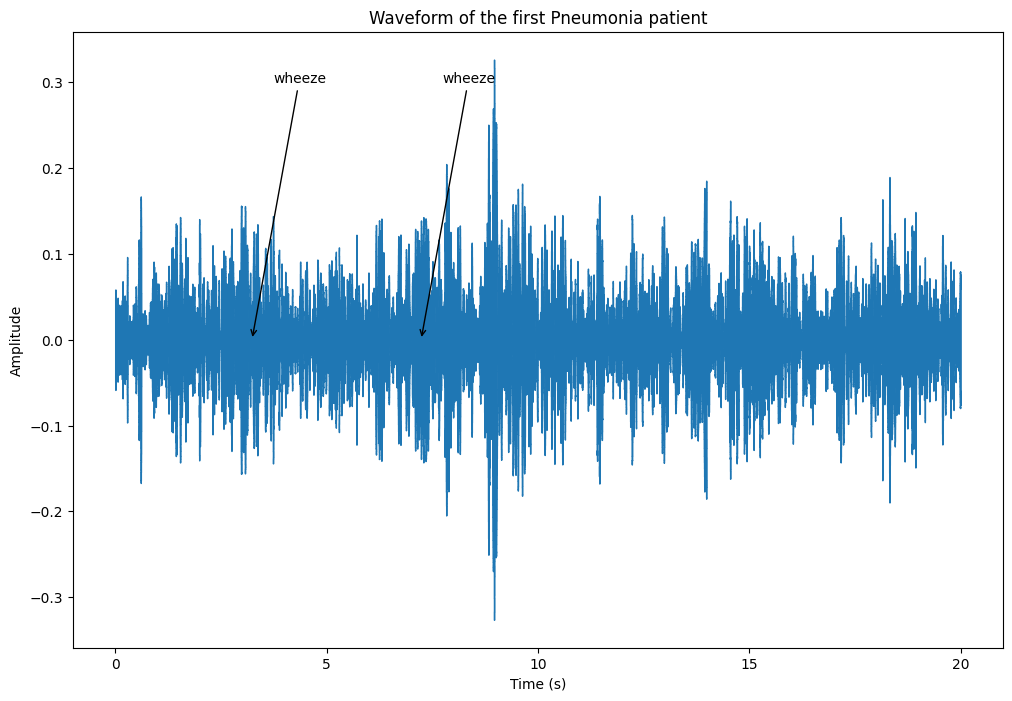

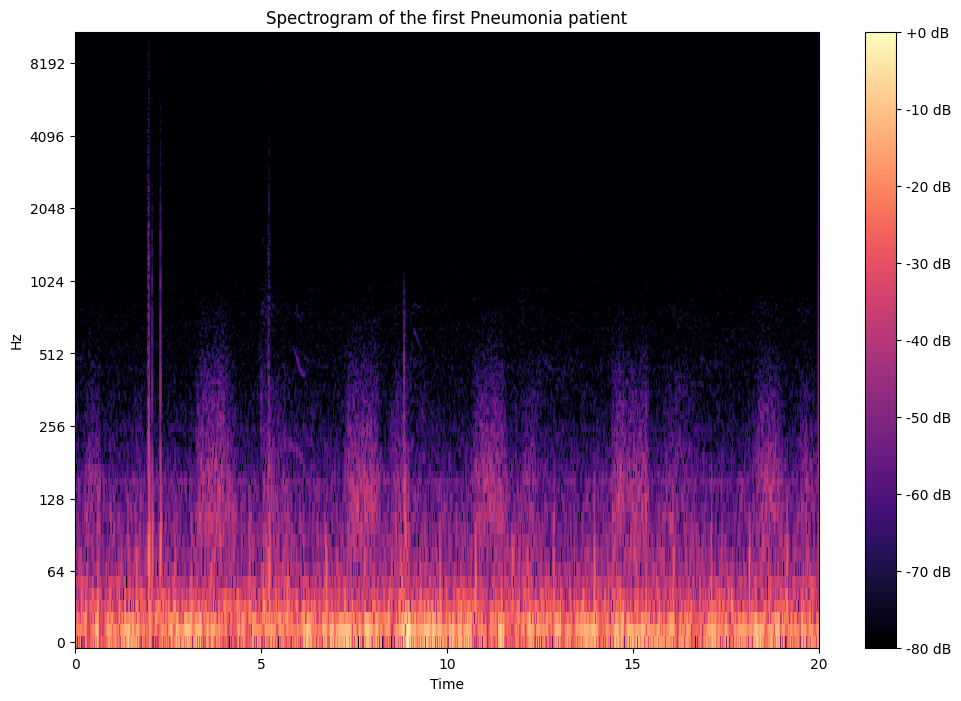

(array([-0.02921091, -0.04258309, -0.03838915, ..., -0.07247789,
        -0.06979419, -0.07583347], dtype=float32),
 22050)

In [347]:
wav_filename = generate_plot(merged_df, "Pneumonia")
Audio(Path.cwd() / "data" / "selected_files" / wav_filename)
generate_spectrogram(wav_filename, "Pneumonia")

# Feature extraction

In [348]:
# Data augmentation

def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(y=data, rate=rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sr, n_steps=2):
    return librosa.effects.pitch_shift(data, sr=sr, n_steps=n_steps)

In [349]:
def extract_features(data, sample_rate):
    # ZCR
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr)) # stacking horizontally

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) # stacking horizontally

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc)) # stacking horizontally

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms)) # stacking horizontally

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel)) # stacking horizontally
    
    return result

def get_features(path):
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    
    # without augmentation
    res1 = extract_features(data=data, sample_rate=sample_rate)
    result = np.array(res1)
    
    # data with noise
    noise_data = noise(data=data)
    res2 = extract_features(data=noise_data, sample_rate=sample_rate)
    result = np.vstack((result, res2)) # stacking vertically
    
    # data with stretching and pitching
    new_data = stretch(data)
    data_stretch_pitch = pitch(data=new_data, sr=sample_rate)
    res3 = extract_features(data_stretch_pitch, sample_rate=sample_rate)
    result = np.vstack((result, res3)) # stacking vertically
    
    return result

In [350]:
# get features for all the selected files
X = []
y = []

for filename in selected_filenames:
    if filename.endswith("wav"):
        features = get_features(Path.cwd() / "data" / "selected_files" / filename)
        # we made 3 data augmentation, so we have 3 sets of features for each file
        for feature in features:
            X.append(feature)
            patient_number = filename.split('_')[0].split('.')[0]
            label = merged_df[merged_df['patient_number'] == int(patient_number)]['diagnosis'].values[0]
            y.append(label)

X = np.array(X)
y = np.array(y)

print(X)
print(y)


c:\Users\alexa\miniconda3\envs\son\lib\site-packages\librosa\core\pitch.py:101: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(


[[1.40154803e-03 8.43658209e-01 8.84091139e-01 ... 2.04681513e-07
  1.66922078e-07 9.53798178e-08]
 [5.87293837e-03 8.83382225e-01 9.25662735e-01 ... 2.00360864e-05
  2.11562711e-05 2.00280072e-05]
 [3.33839699e-03 6.75109625e-01 7.42874980e-01 ... 3.10258947e-08
  1.67442682e-08 1.92386884e-09]
 ...
 [1.11219618e-03 8.52304041e-01 8.62278342e-01 ... 3.82738244e-06
  3.03955881e-06 1.46263073e-06]
 [1.44721137e-02 9.10308018e-01 9.15317033e-01 ... 1.62451078e-03
  1.76770266e-03 1.61479696e-03]
 [1.66377315e-03 8.09446812e-01 8.28506052e-01 ... 8.11364146e-07
  5.25151393e-07 9.50520516e-08]]
['Healthy' 'Healthy' 'Healthy' 'Asthma' 'Asthma' 'Asthma' 'COPD' 'COPD'
 'COPD' 'COPD' 'COPD' 'COPD' 'COPD' 'COPD' 'COPD' 'COPD' 'COPD' 'COPD'
 'COPD' 'COPD' 'COPD' 'COPD' 'COPD' 'COPD' 'URTI' 'URTI' 'URTI' 'COPD'
 'COPD' 'COPD' 'COPD' 'COPD' 'COPD' 'COPD' 'COPD' 'COPD' 'COPD' 'COPD'
 'COPD' 'COPD' 'COPD' 'COPD' 'COPD' 'COPD' 'COPD' 'COPD' 'COPD' 'COPD'
 'COPD' 'COPD' 'COPD' 'COPD' 'COPD' 'COPD' '

In [351]:
print(X.shape, y.shape)


Features = pd.DataFrame(X)
Features['label'] = y
Features.to_csv('features.csv', index=False)
print(Features)

(345, 162) (345,)
            0         1         2         3         4         5         6  \
0    0.001402  0.843658  0.884091  0.913450  0.914516  0.869469  0.792956   
1    0.005873  0.883382  0.925663  0.941343  0.941896  0.922622  0.839750   
2    0.003338  0.675110  0.742875  0.846828  0.879353  0.872888  0.860690   
3    0.001072  0.779321  0.808086  0.844489  0.870172  0.890875  0.849569   
4    0.003644  0.852774  0.871240  0.891282  0.920273  0.945122  0.848977   
..        ...       ...       ...       ...       ...       ...       ...   
340  0.043597  0.892026  0.907305  0.943301  0.962786  0.957416  0.837917   
341  0.002463  0.763706  0.750050  0.768024  0.825580  0.873780  0.867532   
342  0.001112  0.852304  0.862278  0.888617  0.892920  0.897909  0.879072   
343  0.014472  0.910308  0.915317  0.930723  0.946443  0.959546  0.866096   
344  0.001664  0.809447  0.828506  0.825004  0.857517  0.864568  0.834890   

            7         8         9  ...           153     

# Random forest

In [352]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

                precision    recall  f1-score   support

        Asthma       0.00      0.00      0.00         2
Bronchiectasis       0.75      0.43      0.55         7
 Bronchiolitis       0.50      0.25      0.33         4
          COPD       0.81      0.93      0.86        27
       Healthy       0.00      0.00      0.00         5
          LRTI       0.00      0.00      0.00         2
     Pneumonia       0.69      1.00      0.82        20
          URTI       0.67      1.00      0.80         2

      accuracy                           0.74        69
     macro avg       0.43      0.45      0.42        69
  weighted avg       0.64      0.74      0.67        69



c:\Users\alexa\miniconda3\envs\son\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\alexa\miniconda3\envs\son\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\alexa\miniconda3\envs\son\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# AST model

In [ ]:
import torch
from transformers import AutoFeatureExtractor, ASTForAudioClassification

# Load the model
model_name = "MIT/ast-finetuned-audioset-10-10-0.4593"

c:\Users\alexa\miniconda3\envs\son\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
